<a href="https://colab.research.google.com/github/jchen8000/MLDLwithPython/blob/main/4_06_Support_Vector_Machine/Support_Vector_Machine_Introduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Support Vector Machine (SVM)

## Introduction

### Linear Kernel

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import svm
from scipy import stats
from sklearn import model_selection
from sklearn import metrics

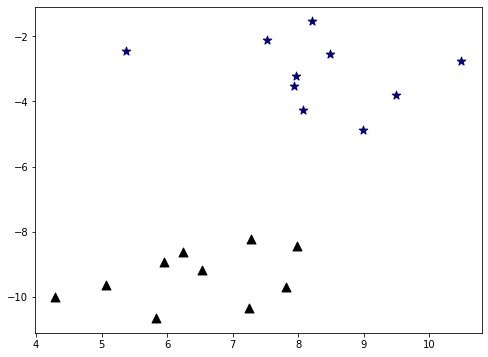

In [2]:
# Generate sample data
X, y = datasets.make_blobs(n_samples=20, centers=2, 
                  random_state=6) 

# plotting scatters  
colors = {0: 'navy', 1: 'black'}
markers = {0: '*', 1: '^'}
plt.figure(1, figsize=(8,6))
for g in np.unique(y):
    ix = np.where(y == g)
    plt.scatter(X[ix,0], X[ix,1], 
                marker = markers[g], 
                c = colors[g],
                s=80,)
plt.show()  

In [3]:
svm_linear = svm.SVC(kernel='linear')
svm_linear.fit(X, y)

SVC(kernel='linear')

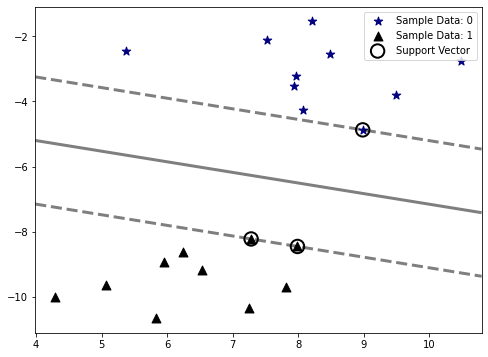

In [4]:
def plot_svc_decision_function(model, ax=None):
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 100)
    y = np.linspace(ylim[0], ylim[1], 100)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'],
               linewidths=3
              )
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

def plot_support_vectors(model): 
    plt.scatter(model.support_vectors_[:, 0],
                model.support_vectors_[:, 1],
                s=180, edgecolors='k', lw=2,
                facecolors='none',
                label = "Support Vector");    
    
plt.figure(1, figsize=(8,6))
for g in np.unique(y):
    ix = np.where(y == g)
    plt.scatter(X[ix,0], X[ix,1], 
                marker = markers[g], 
                c = colors[g], s=80,
                label = r'Sample Data: %d'%g)
plot_svc_decision_function(svm_linear)
plot_support_vectors(svm_linear)
plt.legend()
plt.savefig("svm_introduction1.svg", format="svg", transparent=True, bbox_inches='tight')
plt.show() 

### Non-linear Kernel

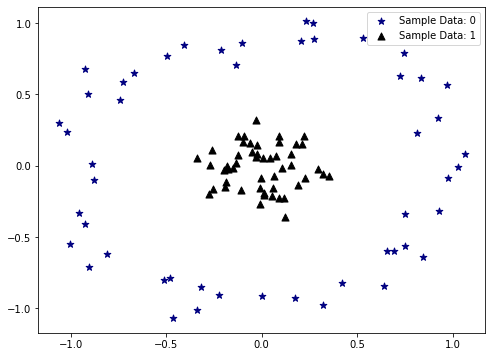

In [5]:
X1, y1 = datasets.make_circles(100, 
                               factor=.2, 
                               noise=.1, 
                               random_state=1)
plt.figure(1, figsize=(8,6))
for g in np.unique(y1):
    ix = np.where(y1 == g)
    plt.scatter(X1[ix,0], X1[ix,1], 
                marker = markers[g], 
                c = colors[g],
                s=50,
                label = r'Sample Data: %d'%g)
plt.legend()
plt.savefig("svm_introduction2a.svg", format="svg", transparent=True, bbox_inches='tight')
plt.show()  

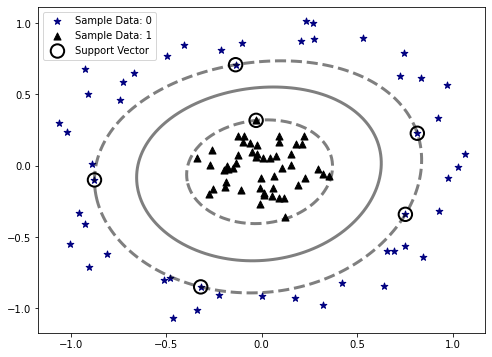

In [6]:
svm_rbf = svm.SVC(kernel='rbf', gamma='auto', C=1E6)
svm_rbf.fit(X1, y1)

plt.figure(1, figsize=(8,6))
for g in np.unique(y1):
    ix = np.where(y1 == g)
    plt.scatter(X1[ix,0], X1[ix,1], 
                marker = markers[g], 
                c = colors[g],
                s=50,
                label = r'Sample Data: %d'%g)
plot_svc_decision_function(svm_rbf)
plot_support_vectors(svm_rbf)
plt.legend()
plt.savefig("svm_introduction2b.svg", format="svg", transparent=True, bbox_inches='tight')
plt.show()  

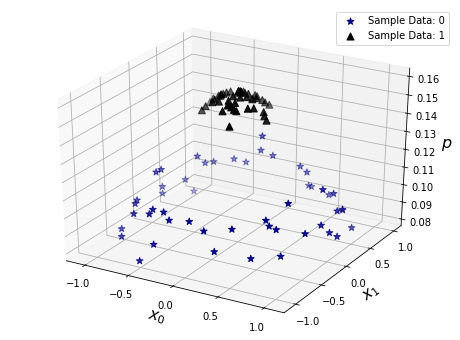

In [7]:
mu = np.mean(X1, axis=0)
p = stats.multivariate_normal.pdf(X1, mu)

fig = plt.figure(1, figsize=(8,6))
ax = fig.add_subplot(1, 1, 1, projection='3d')
for g in np.unique(y1):
    ix = np.where(y1 == g)
    ax.scatter3D(X1[ix,0], X1[ix,1], p[ix], s=50, marker = markers[g], c = colors[g],label = r'Sample Data: %d'%g)
ax.set_xlabel(r'$x_0$',fontsize=16)
ax.set_ylabel(r'$x_1$',fontsize=16)
ax.set_zlabel(r'$p$',fontsize=16)
plt.legend()
plt.savefig("svm_introduction2c.svg", format="svg", transparent=True, bbox_inches='tight')
plt.show()  

## IRIS dataset

In [8]:
from sklearn import datasets
iris = datasets.load_iris()
print ("Data Structure:", dir(iris))
print ("Description:\n", iris.DESCR)
print ("Data (first 10):\n",iris.data[0:10]) 
print ("Label:\n", iris.target)            
print ("Label Name:", iris.target_names) 
print ("Unique Label:", np.unique(iris.target)) 
print ("Feature:", iris.feature_names) 


Data Structure: ['DESCR', 'data', 'data_module', 'feature_names', 'filename', 'frame', 'target', 'target_names']
Description:
 .. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.949

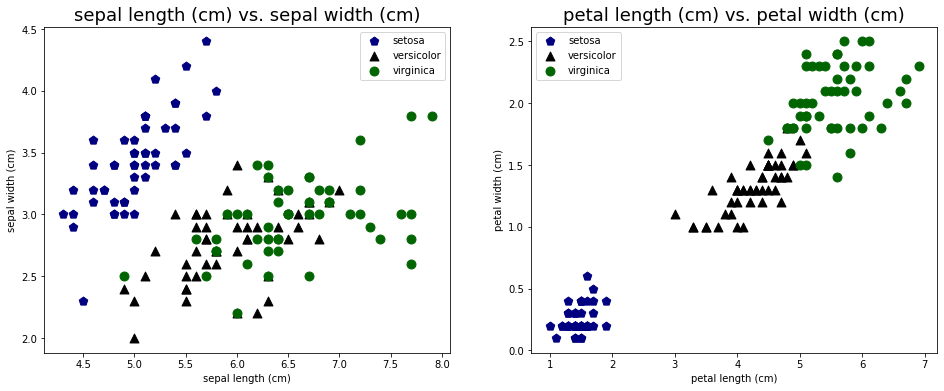

In [9]:
# Show IRIS data
def show_iris(feature1, feature2):
    colors = {0: 'navy', 1: 'black', 2: 'darkgreen'}
    markers = {0: 'p', 1: '^', 2: 'o'}  
    n_samples = len(iris.target)
    for t in set(iris.target):
        x = [iris.data[i,feature1] for i in range(n_samples) if iris.target[i]==t]
        y = [iris.data[i,feature2] for i in range(n_samples) if iris.target[i]==t]
        plt.scatter(x, y, c=colors[t],s=80, marker=markers[t], label=iris.target_names[t])
    plt.xlabel(iris.feature_names[feature1])
    plt.ylabel(iris.feature_names[feature2])
    plt.title(iris.feature_names[feature1] + " vs. " + iris.feature_names[feature2], fontsize=18)
    plt.legend(iris.target_names)

fig = plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
show_iris(0, 1)
plt.subplot(1, 2, 2)
show_iris(2, 3)
plt.savefig("iris_dataset.svg", format="svg", transparent=True, bbox_inches='tight')
plt.show()

In [10]:
X_train, X_test, y_train, y_test = \
model_selection.train_test_split(iris.data, 
                                 iris.target, 
                                 train_size = .75, 
                                 random_state=0)

Apply SVM with RBF kernel

In [11]:
svm_iris = svm.SVC(kernel='rbf')
svm_iris.fit(X_train, y_train)
y_pred = svm_iris.predict(X_test)
a_score = metrics.accuracy_score(y_test, y_pred)
c_matrix = metrics.confusion_matrix(y_test, y_pred)
c_report = metrics.classification_report(y_test, y_pred)
print("Accuracy Score:\n", a_score)
print("Confusion matrix:\n", c_matrix)
print("Classification Report:\n", c_report)

Accuracy Score:
 0.9736842105263158
Confusion matrix:
 [[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      0.94      0.97        16
           2       0.90      1.00      0.95         9

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38



Apply SVM with Polynomial kernel

In [12]:
svm_iris1 = svm.SVC(kernel='poly', degree=8)
svm_iris1.fit(X_train, y_train)
y_pred = svm_iris1.predict(X_test)
a_score = metrics.accuracy_score(y_test, y_pred)
c_matrix = metrics.confusion_matrix(y_test, y_pred)
c_report = metrics.classification_report(y_test, y_pred)
print("Accuracy Score:\n", a_score)
print("Confusion matrix:\n", c_matrix)
print("Classification Report:\n", c_report)

Accuracy Score:
 0.9736842105263158
Confusion matrix:
 [[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      0.94      0.97        16
           2       0.90      1.00      0.95         9

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38



Apply SVM with Linear kernel

In [13]:
svm_iris2 = svm.SVC(kernel='linear')
svm_iris2.fit(X_train, y_train)
y_pred2 = svm_iris2.predict(X_test)
a_score = metrics.accuracy_score(y_test, y_pred2)
c_matrix = metrics.confusion_matrix(y_test, y_pred2)
c_report = metrics.classification_report(y_test, y_pred2)
print("Accuracy Score:\n", a_score)
print("Confusion matrix:\n", c_matrix)
print("Classification Report:\n", c_report)

Accuracy Score:
 0.9736842105263158
Confusion matrix:
 [[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      0.94      0.97        16
           2       0.90      1.00      0.95         9

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38



Apply SVM with Sigmoid kernel:

In [14]:
svm_iris3 = svm.SVC(kernel='sigmoid')
svm_iris3.fit(X_train, y_train)
y_pred3 = svm_iris3.predict(X_test)
a_score = metrics.accuracy_score(y_test, y_pred3)
c_matrix = metrics.confusion_matrix(y_test, y_pred3)
c_report = metrics.classification_report(y_test, y_pred3)
print("Accuracy Score:\n", a_score)
print("Confusion matrix:\n", c_matrix)
print("Classification Report:\n", c_report)

Accuracy Score:
 0.23684210526315788
Confusion matrix:
 [[ 0  0 13]
 [ 0  0 16]
 [ 0  0  9]]
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        13
           1       0.00      0.00      0.00        16
           2       0.24      1.00      0.38         9

    accuracy                           0.24        38
   macro avg       0.08      0.33      0.13        38
weighted avg       0.06      0.24      0.09        38



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Hand-written Digits Dataset

In [15]:
digits = datasets.load_digits()
X_train, X_test, y_train, y_test = \
model_selection.train_test_split(digits.data, 
                                 digits.target, 
                                 train_size = .75, 
                                 random_state=0)

Randomely show 100 digits:

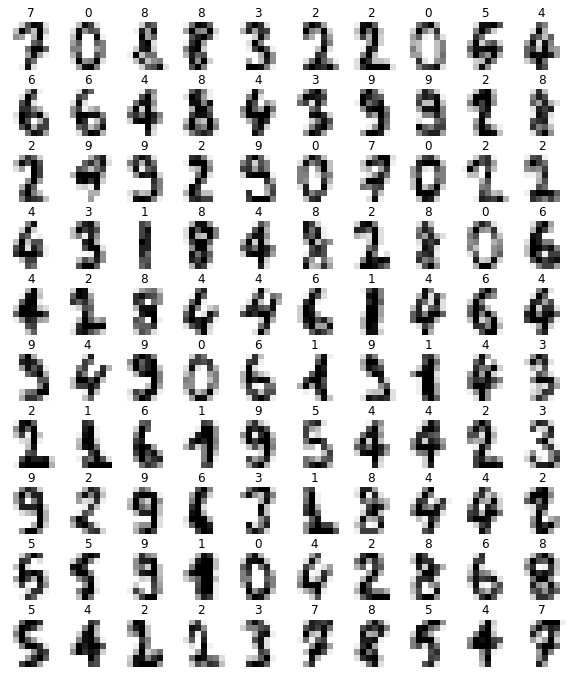

In [16]:
fig = plt.figure(figsize=(10,12))
for i in range(100):
    idx = np.random.randint(digits.images.shape[0])
    plt.subplot(10,10,i+1)
    plt.imshow(digits.images[idx], cmap='binary')
    plt.title(digits.target[idx])
    plt.axis('off')
plt.show()

Apply SVM with RBF kernel:

In [17]:
svm_digits = svm.SVC(kernel='rbf')
svm_digits.fit(X_train, y_train)
y_pred = svm_digits.predict(X_test)
a_score = metrics.accuracy_score(y_test, y_pred)
c_matrix = metrics.confusion_matrix(y_test, y_pred)
c_report = metrics.classification_report(y_test, y_pred)
print("Accuracy Score:\n", a_score)
print("Confusion matrix:\n", c_matrix)
print("Classification Report:\n", c_report)

Accuracy Score:
 0.9911111111111112
Confusion matrix:
 [[37  0  0  0  0  0  0  0  0  0]
 [ 0 43  0  0  0  0  0  0  0  0]
 [ 0  0 44  0  0  0  0  0  0  0]
 [ 0  0  0 44  0  0  0  0  1  0]
 [ 0  0  0  0 38  0  0  0  0  0]
 [ 0  0  0  0  0 47  0  0  0  1]
 [ 0  0  0  0  0  0 52  0  0  0]
 [ 0  0  0  0  0  0  0 48  0  0]
 [ 0  1  0  0  0  0  0  0 47  0]
 [ 0  0  0  0  0  1  0  0  0 46]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       0.98      1.00      0.99        43
           2       1.00      1.00      1.00        44
           3       1.00      0.98      0.99        45
           4       1.00      1.00      1.00        38
           5       0.98      0.98      0.98        48
           6       1.00      1.00      1.00        52
           7       1.00      1.00      1.00        48
           8       0.98      0.98      0.98        48
           9       0.98      0.98      0.98      